In [226]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import scipy.io
mat = scipy.io.loadmat('ecoli.mat')

In [227]:
xTrain=mat['xTrain']
yTrain=mat['yTrain']
xTest=mat['xTest']
yTest=mat['yTest']

In [228]:
def convert_to_list(mat_obj):
    y=[]
    for i in mat_obj:
        y.append(i[0])
    return y

yTrain=convert_to_list(yTrain)
#xTrain=convert_to_list(xTrain)
#xTest=convert_to_list(xTest)
yTest=convert_to_list(yTest)

print(xTrain[0:10],yTrain[:10])

(array([[ 0.44,  0.28,  0.43,  0.27,  0.37],
       [ 0.31,  0.36,  0.58,  0.94,  0.94],
       [ 0.58,  0.55,  0.57,  0.7 ,  0.74],
       [ 0.38,  0.44,  0.43,  0.2 ,  0.31],
       [ 0.29,  0.28,  0.5 ,  0.42,  0.5 ],
       [ 0.78,  0.44,  0.45,  0.73,  0.68],
       [ 0.64,  0.78,  0.5 ,  0.36,  0.38],
       [ 0.83,  0.48,  0.65,  0.76,  0.79],
       [ 0.32,  0.39,  0.53,  0.28,  0.38],
       [ 0.77,  0.57,  0.88,  0.53,  0.2 ]]), [1, 2, 2, 1, 1, 4, 3, 4, 3, 5])


In [229]:
p=[]
def prior(yTrain):
    global class_label,no_classes
    class_label=Counter(yTrain)
    no_classes=len(class_label)

    for item in class_label.values():
        p.append(float(item)/float(len(yTrain)))
    return p

In [230]:
p=prior(yTrain)
print class_label
print(p)

Counter({1: 103, 2: 51, 3: 31, 4: 22, 5: 11})
[0.4724770642201835, 0.23394495412844038, 0.14220183486238533, 0.10091743119266056, 0.05045871559633028]


In [231]:
no_samples=int(np.shape(xTrain)[0])
no_features=int(np.shape(xTrain)[1])

class1_feature_values,class2_feature_values,class3_feature_values,class4_feature_values,class5_feature_values=[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]]

for feature_index in range(no_features):
    for sample in range(no_samples):#no_samples
        if yTrain[sample]==1:
            class1_feature_values[feature_index].append(xTrain[sample][feature_index])
        elif yTrain[sample]==2:
            class2_feature_values[feature_index].append(xTrain[sample][feature_index])
        elif yTrain[sample]==3:
            class3_feature_values[feature_index].append(xTrain[sample][feature_index])
        elif yTrain[sample]==4:
            class4_feature_values[feature_index].append(xTrain[sample][feature_index])
        elif yTrain[sample]==5:
            class5_feature_values[feature_index].append(xTrain[sample][feature_index])


In [232]:
#print((class2_feature_values[1]))

In [233]:
M=np.zeros((5,5))
V=np.zeros((5,5))
for i in range(no_features):
    M[i][0]=(np.mean(class1_feature_values[i]))
    V[i][0]=(np.var(class1_feature_values[i]))
    M[i][1]=(np.mean(class2_feature_values[i]))
    V[i][1]=(np.var(class2_feature_values[i]))
    M[i][2]=(np.mean(class3_feature_values[i]))
    V[i][2]=(np.var(class3_feature_values[i]))
    M[i][3]=(np.mean(class4_feature_values[i]))
    V[i][3]=(np.var(class4_feature_values[i]))
    M[i][4]=(np.mean(class5_feature_values[i]))
    V[i][4]=(np.var(class5_feature_values[i]))
print(M)
print(V)


[[ 0.35941748  0.47176471  0.65129032  0.73909091  0.68909091]
 [ 0.40728155  0.5054902   0.71580645  0.47045455  0.69      ]
 [ 0.45339806  0.52686275  0.43032258  0.58136364  0.76727273]
 [ 0.30796117  0.7554902   0.47        0.74909091  0.48181818]
 [ 0.39300971  0.71019608  0.38709677  0.76909091  0.31545455]]
[[ 0.01513558  0.04263414  0.01081769  0.01084463  0.00419008]
 [ 0.00763533  0.00782868  0.02135338  0.00950434  0.01081818]
 [ 0.00902243  0.01632741  0.00637086  0.00393905  0.0042562 ]
 [ 0.00907254  0.01229535  0.01243871  0.00563554  0.00665124]
 [ 0.00896861  0.03632741  0.01572383  0.00478099  0.01077025]]


#normalizing M and V matrix
for i in range(no_features):
    M[i][0]/=np.sum(M[i][:])
    V[i][0]/=np.sum(V[i][:])
    M[i][1]/=np.sum(M[i][:])
    V[i][1]/=np.sum(V[i][:])
    M[i][2]/=np.sum(M[i][:])
    V[i][2]/=np.sum(V[i][:])
    M[i][3]/=np.sum(M[i][:])
    V[i][3]/=np.sum(V[i][:])
    M[i][4]/=np.sum(M[i][:])
    V[i][4]/=np.sum(V[i][:])
print(M)
print(V)

In [234]:
no_classes=np.shape(M)[1]
print(no_classes)

print([M[0][0],M[1][0],M[2][0],M[3][0],M[4][0]])

5
[0.3594174757281553, 0.40728155339805833, 0.45339805825242724, 0.30796116504854371, 0.39300970873786412]


In [235]:
nb=[]
def naiveBayes(x, M, V, p):
    for row in x[:]:
        prod=[1,1,1,1,1]
        for feat in range(len(row)):
            for c in range(no_classes):
                prod[c]*=(1/np.sqrt(V[feat][c]))*np.exp(-0.5*((row[feat]-M[feat][c])**2)/V[feat][c])
        
        prod=np.multiply(prod,p)
        nb.append(np.argmax(prod)+1)
        
    return nb

In [236]:
nb=(naiveBayes(xTest, M, V, p))
print(nb)

[3, 5, 2, 4, 1, 1, 2, 2, 1, 5, 1, 1, 1, 3, 1, 3, 1, 1, 1, 4, 4, 3, 1, 3, 3, 2, 1, 3, 1, 1, 2, 2, 2, 1, 1, 4, 1, 1, 5, 2, 2, 1, 1, 1, 1, 3, 2, 1, 5, 3, 4, 4, 2, 1, 3, 1, 4, 3, 4, 4, 2, 3, 2, 5, 4, 4, 4, 5, 5, 1, 1, 2, 3, 3, 4, 4, 1, 5, 4, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 4, 2, 1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 1, 4, 4, 1, 1]


In [237]:
#fraction classified correctly
match_count=0
class_1_pred=0
class_2_pred=0
class_3_pred=0
class_4_pred=0
class_5_pred=0

class1_trpos=0
class2_trpos=0
class3_trpos=0
class4_trpos=0
class5_trpos=0

precision_array=[]
recall_array=[]

for i in range(len(nb)):
    if nb[i]==yTest[i]:
        match_count+=1
    if nb[i]==1:
        class_1_pred+=1
        if yTest[i]==1:
            class1_trpos+=1
    if nb[i]==2:
        class_2_pred+=1
        if yTest[i]==2:
            class2_trpos+=1
    if nb[i]==3:
        class_3_pred+=1
        if yTest[i]==3:
            class3_trpos+=1
    if nb[i]==4:
        class_4_pred+=1
        if yTest[i]==4:
            class4_trpos+=1
    if nb[i]==5:
        class_5_pred+=1
        if yTest[i]==5:
            class5_trpos+=1
        
    
print(match_count)
print(float(match_count)/float(len(nb))*100)

91
83.4862385321


In [238]:
#precision of class 1
print(class_1_pred,class1_trpos)
class1_prec=float(class1_trpos)/float(class_1_pred)
print(class1_prec)

#recall
i=0
for x in yTest:
    if x==1:
        i+=1
print("true 1's in yTest: ",i)

recall=float(class1_trpos)/float(i)
print(recall)

precision_array.append(class1_prec)
recall_array.append(recall)

(41, 39)
0.951219512195
("true 1's in yTest: ", 40)
0.975


In [239]:
#precision of class 2
print(class_2_pred,class2_trpos)
class2_prec=float(class2_trpos)/float(class_2_pred)
print(class2_prec)

#recall
i=0
for x in yTest:
    if x==2:
        i+=1
print("true 2's in yTest: ",i)

recall=float(class2_trpos)/float(i)
print(recall)

precision_array.append(class1_prec)
recall_array.append(recall)

(21, 17)
0.809523809524
("true 2's in yTest: ", 26)
0.653846153846


In [240]:
#precision of class 3
print(class_3_pred,class3_trpos)
class3_prec=float(class3_trpos)/float(class_3_pred)
print(class3_prec)

#recall
i=0
for x in yTest:
    if x==3:
        i+=1
print("true 3's in yTest: ",i)

recall=float(class3_trpos)/float(i)
print(recall)

precision_array.append(class1_prec)
recall_array.append(recall)

(21, 19)
0.904761904762
("true 3's in yTest: ", 21)
0.904761904762


In [241]:
#precision of class 4
print(class_4_pred,class4_trpos)
class4_prec=float(class4_trpos)/float(class_4_pred)*100
print(class4_prec)

#recall
i=0
for x in yTest:
    if x==4:
        i+=1
print("true 4's in yTest: ",i)

recall=float(class4_trpos)/float(i)
print(recall)

precision_array.append(class1_prec)
recall_array.append(recall)

(18, 9)
50.0
("true 4's in yTest: ", 13)
0.692307692308


In [242]:
#precision of class 5
print(class_5_pred,class5_trpos)
class5_prec=float(class5_trpos)/float(class_5_pred)
print(class5_prec)

#recall
i=0
for x in yTest:
    if x==5:
        i+=1
print("true 5's in yTest: ",i)

recall=float(class5_trpos)/float(i)
print(recall)

precision_array.append(class1_prec)
recall_array.append(recall)

(8, 7)
0.875
("true 5's in yTest: ", 9)
0.777777777778


[0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219]
[0.975, 0.6538461538461539, 0.9047619047619048, 0.6923076923076923, 0.7777777777777778]


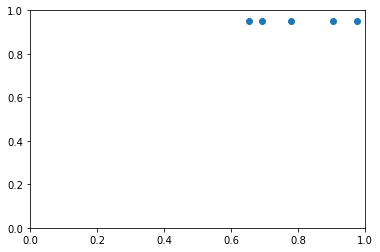

In [243]:
#preciison recall curve
print(precision_array)
print(recall_array)   

plt.plot(recall_array,precision_array,'o')
plt.axis([0,1,0,1])
plt.show()
